In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
matplotlib.rcParams.update({'font.size': 22})

In [2]:
data = pd.read_csv('../data/Regression_Supervised_Train.csv')

In [3]:
data

,lotid,logerror,transactiondate,aircond,style,basement,numbath,numbedroom,classbuild,qualitybuild,decktype,finishedarea1st,finishedarea,perimeterarea,totalarea,finishedareaEntry,countycode,numfireplace,numfullbath,garagenum,garagearea,tubflag,heatingtype,latitude,longitude,lotarea,poolnum,poolarea,citycode,countycode2,neighborhoodcode,regioncode,roomnum,storytype,num34bath,material,unitnum,year,numstories,fireplace,buildvalue,parcelvalue,taxyear,landvalue,totaltaxvalue,taxdelinquencyflag,taxdelinquencyyear,mypointer
0,17214744,NaN,NaN,NaN,NaN,NaN,2.0,3,NaN,NaN,NaN,1255.0,1255.0,NaN,NaN,1255.0,6111,1,2.0,2.0,465.0,NaN,NaN,34191029,-118914689,12497.0,NaN,NaN,34278.0,2061,46736.0,96351.0,6,NaN,NaN,NaN,NaN,1979.0,1.0,NaN,103993.0,142212.0,2015,38219.0,1715.08,NaN,NaN,25711
1,12018724,NaN,NaN,1.0,NaN,NaN,2.0,1,NaN,4.0,NaN,NaN,1033.0,NaN,NaN,NaN,6037,0,2.0,NaN,NaN,NaN,2.0,34092200,-118374000,20527.0,1.0,NaN,48424.0,3101,NaN,96050.0,0,NaN,NaN,NaN,1.0,1973.0,NaN,NaN,129428.0,301141.0,2015,171713.0,3851.88,NaN,NaN,13268
2,11306699,NaN,NaN,1.0,NaN,NaN,3.0,4,NaN,4.0,NaN,NaN,2982.0,NaN,NaN,NaN,6037,0,3.0,NaN,NaN,NaN,2.0,34696444,-118184228,8466.0,NaN,NaN,5534.0,3101,NaN,97319.0,0,NaN,NaN,NaN,1.0,2004.0,NaN,NaN,175069.0,235062.0,2015,59993.0,3818.24,Y,11.0,5423
3,11047729,NaN,NaN,1.0,NaN,NaN,2.0,3,NaN,7.0,NaN,NaN,1757.0,NaN,NaN,NaN,6037,0,2.0,NaN,NaN,NaN,2.0,34252019,-118467570,8612.0,NaN,NaN,12447.0,3101,116646.0,96371.0,0,NaN,NaN,NaN,1.0,1952.0,NaN,NaN,162926.0,270543.0,2015,107617.0,3450.67,NaN,NaN,26198
4,17174848,NaN,NaN,NaN,NaN,NaN,3.0,2,NaN,NaN,66.0,1047.0,1951.0,NaN,NaN,1047.0,6111,0,3.0,2.0,0.0,NaN,NaN,34146639,-119190425,2660.0,NaN,NaN,47198.0,2061,NaN,97109.0,6,NaN,NaN,NaN,NaN,1988.0,2.0,NaN,180532.0,300886.0,2015,120354.0,3394.26,NaN,NaN,25187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24750,11633053,NaN,NaN,1.0,NaN,NaN,3.0,2,NaN,7.0,NaN,NaN,1382.0,NaN,NaN,NaN,6037,0,3.0,NaN,NaN,NaN,2.0,34084400,-118379000,17166.0,1.0,NaN,48424.0,3101,762180.0,96050.0,0,NaN,NaN,NaN,1.0,1982.0,NaN,NaN,214623.0,786817.0,2016,572194.0,9550.24,NaN,NaN,8421
24751,10751511,NaN,NaN,1.0,NaN,NaN,2.0,2,NaN,7.0,NaN,NaN,1127.0,NaN,NaN,NaN,6037,0,2.0,NaN,NaN,NaN,2.0,34134687,-118725713,289439.0,1.0,NaN,9840.0,3101,764088.0,96336.0,0,NaN,NaN,NaN,1.0,1973.0,NaN,NaN,96981.0,282464.0,2015,185483.0,4086.50,NaN,NaN,29610
24752,10719915,NaN,NaN,NaN,NaN,NaN,2.0,4,NaN,6.0,NaN,NaN,2179.0,NaN,NaN,NaN,6037,0,2.0,NaN,NaN,NaN,2.0,34206172,-118614583,8150.0,1.0,NaN,12447.0,3101,30731.0,96342.0,0,NaN,NaN,NaN,1.0,1962.0,NaN,NaN,102310.0,419389.0,2016,317079.0,5259.98,NaN,NaN,17317
24753,11639212,NaN,NaN,1.0,NaN,NaN,5.0,5,NaN,10.0,NaN,NaN,3807.0,NaN,NaN,NaN,6037,0,5.0,NaN,NaN,NaN,2.0,34071872,-118409758,12725.0,1.0,NaN,10389.0,3101,NaN,96086.0,0,NaN,NaN,NaN,1.0,1923.0,NaN,NaN,693832.0,3437492.0,2015,2743660.0,40656.13,NaN,NaN,6587


In [4]:
data.columns

Index(['lotid', 'logerror', 'transactiondate', 'aircond', 'style', 'basement',
       'numbath', 'numbedroom', 'classbuild', 'qualitybuild', 'decktype',
       'finishedarea1st', 'finishedarea', 'perimeterarea', 'totalarea',
       'finishedareaEntry', 'countycode', 'numfireplace', 'numfullbath',
       'garagenum', 'garagearea', 'tubflag', 'heatingtype', 'latitude',
       'longitude', 'lotarea', 'poolnum', 'poolarea', 'citycode',
       'countycode2', 'neighborhoodcode', 'regioncode', 'roomnum', 'storytype',
       'num34bath', 'material', 'unitnum', 'year', 'numstories', 'fireplace',
       'buildvalue', 'parcelvalue', 'taxyear', 'landvalue', 'totaltaxvalue',
       'taxdelinquencyflag', 'taxdelinquencyyear', 'mypointer'],
      dtype='object')

In [5]:
target = "parcelvalue"

In [6]:
data.isnull().mean().sort_values()

lotid                 0.000000
landvalue             0.000000
taxyear               0.000000
parcelvalue           0.000000
roomnum               0.000000
countycode2           0.000000
longitude             0.000000
numfireplace          0.000000
countycode            0.000000
latitude              0.000000
mypointer             0.000000
numbath               0.000000
numbedroom            0.000000
totaltaxvalue         0.000040
regioncode            0.000081
buildvalue            0.000121
year                  0.000485
citycode              0.001252
numfullbath           0.001454
finishedarea          0.002545
lotarea               0.028641
heatingtype           0.362189
neighborhoodcode      0.392971
unitnum               0.403716
qualitybuild          0.408039
aircond               0.415714
poolnum               0.486124
garagearea            0.596284
garagenum             0.596284
numstories            0.610826
finishedarea1st       0.751848
finishedareaEntry     0.751848
num34bat

<AxesSubplot:>

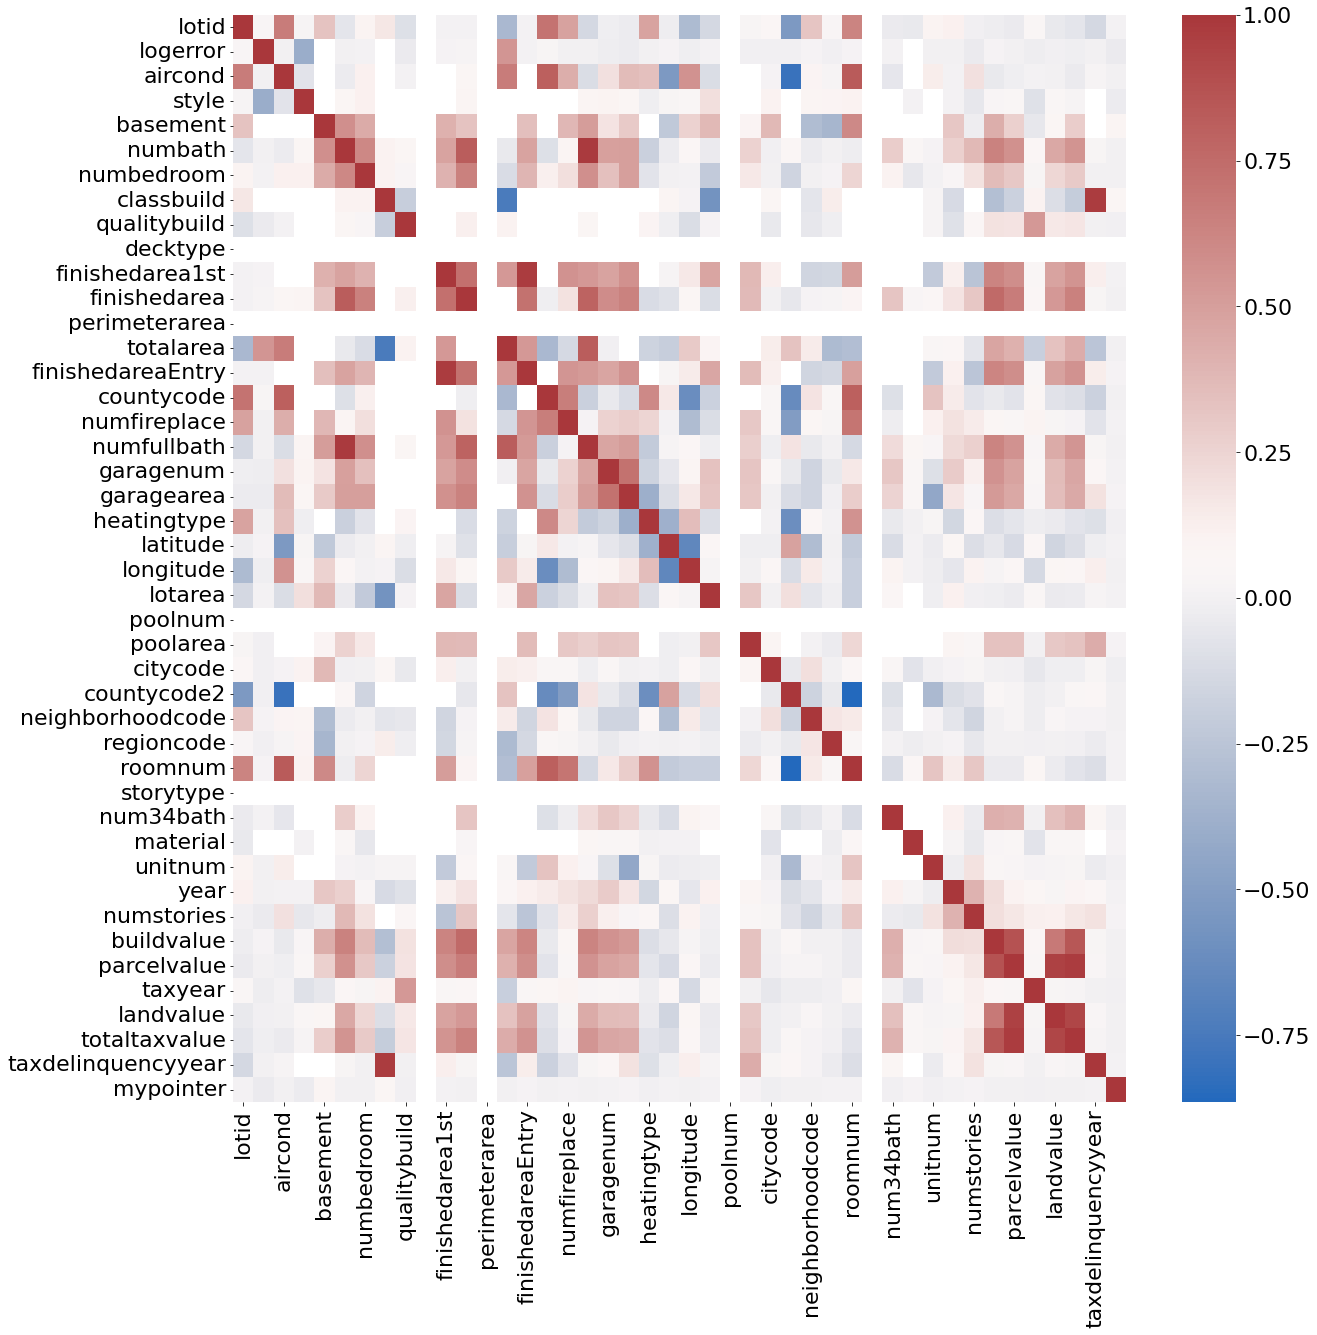

In [7]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), cmap=sns.color_palette("vlag", as_cmap=True))

In [8]:
data.corr().sort_values(target)[target]

classbuild           -0.174194
latitude             -0.125497
countycode           -0.073840
heatingtype          -0.066547
lotid                -0.039520
roomnum              -0.035018
lotarea              -0.032815
aircond              -0.017536
citycode             -0.010391
regioncode           -0.004675
logerror             -0.003588
mypointer            -0.001665
countycode2           0.017850
neighborhoodcode      0.022507
unitnum               0.033238
taxdelinquencyyear    0.034531
taxyear               0.041186
style                 0.042740
material              0.043717
numfireplace          0.045606
longitude             0.063582
year                  0.104243
numstories            0.163545
qualitybuild          0.181906
basement              0.265736
numbedroom            0.307748
poolarea              0.334948
num34bath             0.406166
totalarea             0.411399
garagearea            0.460271
garagenum             0.476646
numfullbath           0.556689
numbath 

In [9]:
feature_names = ['finishedarea', 'garagenum',
                  'garagearea', 'poolnum', 'latitude', 'longitude',
                  'roomnum', 'year', 'numbath', 'numbedroom']

In [10]:
data_selected_cols = data[feature_names + [target]]

<AxesSubplot:>

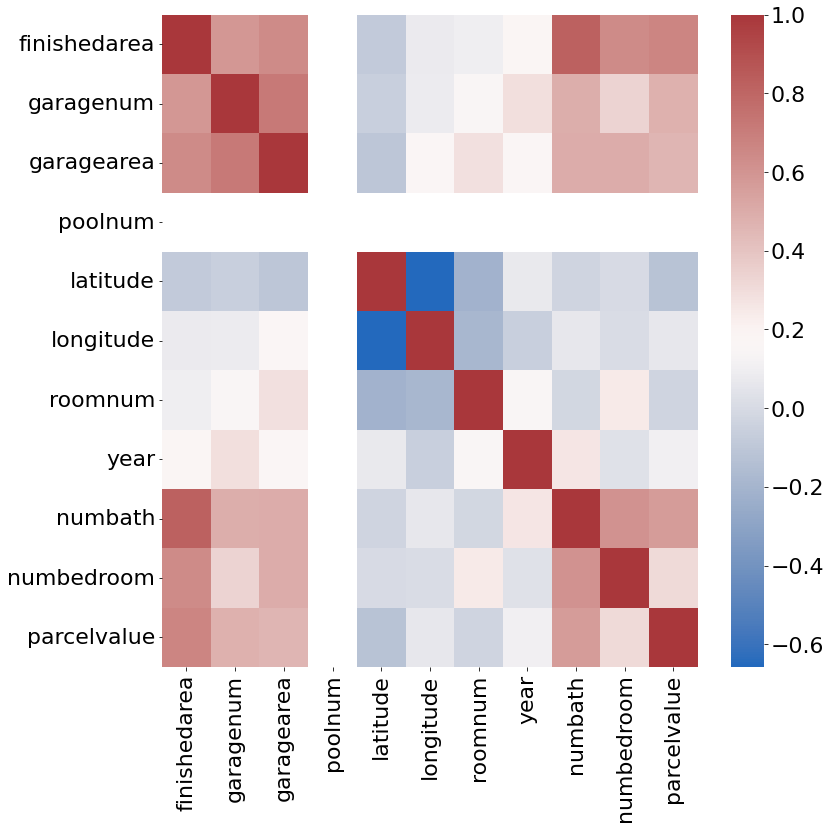

In [11]:
plt.figure(figsize=(12, 12))
sns.heatmap(data_selected_cols.corr(), cmap=sns.color_palette("vlag", as_cmap=True))

In [12]:
data_selected_cols.isnull().mean().sort_values()

latitude        0.000000
longitude       0.000000
roomnum         0.000000
numbath         0.000000
numbedroom      0.000000
parcelvalue     0.000000
year            0.000485
finishedarea    0.002545
poolnum         0.486124
garagenum       0.596284
garagearea      0.596284
dtype: float64

### Let's use the Preprocessors we built

We'll create a pipeline to preprocess the features and evaluate a model.

In [13]:
from real_state_evaluation.fillna_preprocessor import FillnaPreprocessor
from real_state_evaluation.standard_scaler_preprocessor import StandardScalerPreprocessor

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [14]:
features_fillna = ['garagenum', 'garagearea', 'poolnum']
features_standardize = ['finishedarea', 'latitude', 'longitude', 'year']
preprocessing_pipeline = [FillnaPreprocessor(features_fillna, 0), 
                          StandardScalerPreprocessor(features_standardize)]

In [15]:
def validate_model(model, preprocessing_pipeline):
    splitter = KFold(n_splits=5, random_state=None, shuffle=True)
    metrics = []
    for train_index, test_index in splitter.split(data_selected_cols):
        train_df, test_df = data_selected_cols.iloc[train_index], data_selected_cols.iloc[test_index] 
        for preprocessor in preprocessing_pipeline:
            train_df, test_df = preprocessor.preprocess(train_df, test_df)
        
        train_df = train_df.dropna()
        test_df = test_df.dropna()
        
        model.fit(train_df[feature_names], train_df[target])
        predictions = model.predict(test_df[feature_names])
        metrics.append(mean_squared_error(test_df[target], predictions))
    return metrics

In [16]:
metrics_lr = validate_model(LinearRegression(), preprocessing_pipeline)
#Random forest takes a bit of time :)
metrics_random_forest = validate_model(RandomForestRegressor(), preprocessing_pipeline)

In [17]:
print("Mean RMSE Linear Regression:", np.mean(metrics_lr))
print("Mean RMSE Random Forest Regression:", np.mean(metrics_random_forest))

Mean RMSE Linear Regression: 269981541340.038
Mean RMSE Random Forest Regression: 216875514711.70096
